In [72]:
import pandas as pd

import math
import matplotlib
import numpy as np

# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

from ai import cs
from scipy.fft import fft, ifft, fftfreq, dct, idct
from scipy import signal

import tensorflow as tf

import random
import filterpy

In [44]:
input = open("data_noise_sinus/data_noise_sinus.txt").readlines()
input2 = open("data_noise_multitone/data_noise_multitone.txt").readlines()
input

['\n',
 '\n',
 '\n',
 '2022-12-02 22:20:21:565089  ->     Device used:genmet0\n',
 '\n',
 '2022-12-02 22:20:21:565089  ->     Theta   Phi             X              Y              Z                      |0>            |1>\n',
 '2022-12-02 22:20:21:628247  ->      36.0    56.9           0.3209906789   0.4923987072   0.8090169944           0.9510565163   0.1687547866 +0.2588693199 *i\n',
 '2022-12-02 22:20:22:180768  ->      35.6    48.9           0.3826732306   0.4386665601   0.8131007610           0.9521293927   0.2009565262 +0.2303607910 *i\n',
 '2022-12-02 22:20:22:733142  ->      38.3    26.6           0.5541780472   0.2775116939   0.7847763705           0.9446630009   0.2933204998 +0.1468839648 *i\n',
 '2022-12-02 22:20:23:284986  ->      38.7    60.6           0.3069339669   0.5447200375   0.7804304073           0.9435121640   0.1626550132 +0.2886661446 *i\n',
 '2022-12-02 22:20:23:840155  ->      38.1    38.2           0.4849018958   0.3815801654   0.7869350220           0.945234

In [45]:
def parse_line(line: str):
    strings = [x for x in line.split(" ") if x != "" and x != "->"][0:-1]
    strings = [float(x) if i > 1 else x for i, x in enumerate(strings)]
    datetime_str = strings[0] + 'T' + strings[1]
    datetime_str = datetime_str[:19] + "." + datetime_str[20:]
    strings = [pd.Timestamp(datetime_str)] + strings[2:]
    return strings


columns = ['datetime', 'Theta', 'Phi', 'X', 'Y', 'Z', '|0>', '|1> r', '|1> i']
data = [parse_line(l) for l in input[6:]]
data2 = [parse_line(l) for l in input2[6:]]

In [46]:
df = pd.DataFrame(data, columns=columns)
df2 = pd.DataFrame(data2, columns=columns)
df

,datetime,Theta,Phi,X,Y,Z,|0>,|1> r,|1> i
0,2022-12-02 22:20:21.628247,36.0,56.9,0.320991,0.492399,0.809017,0.951057,0.168755,0.258869
1,2022-12-02 22:20:22.180768,35.6,48.9,0.382673,0.438667,0.813101,0.952129,0.200957,0.230361
2,2022-12-02 22:20:22.733142,38.3,26.6,0.554178,0.277512,0.784776,0.944663,0.293320,0.146884
3,2022-12-02 22:20:23.284986,38.7,60.6,0.306934,0.544720,0.780430,0.943512,0.162655,0.288666
4,2022-12-02 22:20:23.840155,38.1,38.2,0.484902,0.381580,0.786935,0.945234,0.256498,0.201844
...,...,...,...,...,...,...,...,...,...
8699,2022-12-02 23:40:26.075369,38.7,61.0,0.303124,0.546850,0.780430,0.943512,0.160636,0.289795
8700,2022-12-02 23:40:26.627850,38.8,40.3,0.477891,0.405281,0.779338,0.943223,0.253329,0.214838
8701,2022-12-02 23:40:27.180213,42.9,31.1,0.582879,0.351615,0.732543,0.930737,0.313128,0.188891
8702,2022-12-02 23:40:27.732510,39.6,62.5,0.294330,0.565402,0.770513,0.940881,0.156412,0.300464


In [47]:
deltas = [(df["datetime"][i+1]-df["datetime"][i]).total_seconds()  for i in range(df.shape[0]-2, 0, -1)]
average_delta = sum(deltas)/len(deltas)
average_delta

0.5522987566076781

In [48]:
df["datetime"][1] - df["datetime"][0]

Timedelta('0 days 00:00:00.552521')

In [49]:
class Filter:
    def filter_1d_array(self, array):
        raise NotImplemented


class EmptyFilter(Filter):
    def filter_1d_array(self, array):
        return array


class IIR(Filter):
    def __init__(self, r: float, start=None):
        self.r = r
        self.start = start

    def filter_1d_array(self, array):
        output = []
        if self.start is None:
            x = array[0]
        else:
            x = self.start
        for i in range(len(array)):
            x = self.r * x + (1 - self.r) * array[i]
            output.append(x)
        return output


class RunningAverage(Filter):
    def __init__(self, width: int):
        self.width = width

    def filter_1d_array(self, array):
        f = np.array([1 for _ in range(self.width)])
        return signal.convolve(f, array)


class Gaussian(Filter):
    def __init__(self, width: int, std_dev: float):
        self.width = width
        self.std_dev = std_dev

    def filter_1d_array(self, array):
        f = signal.windows.gaussian(self.width, self.std_dev)
        return signal.convolve(f, array)



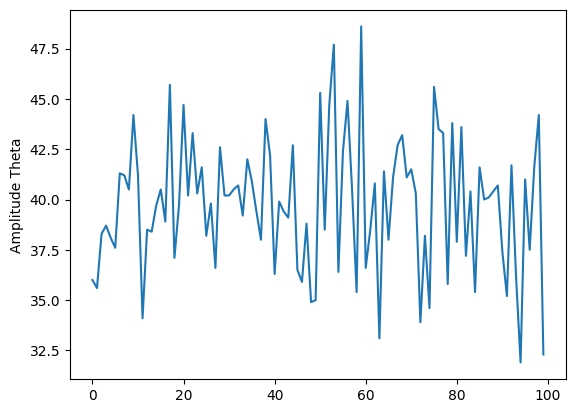

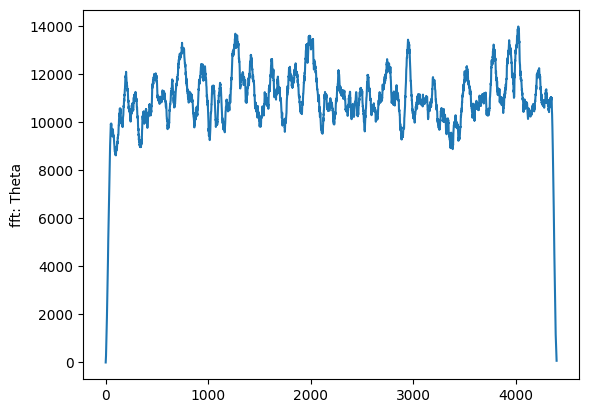

Average: 39.60754825367656
Average absolute deviation: 2.7356815087341504
std dev: 3.38896847376098


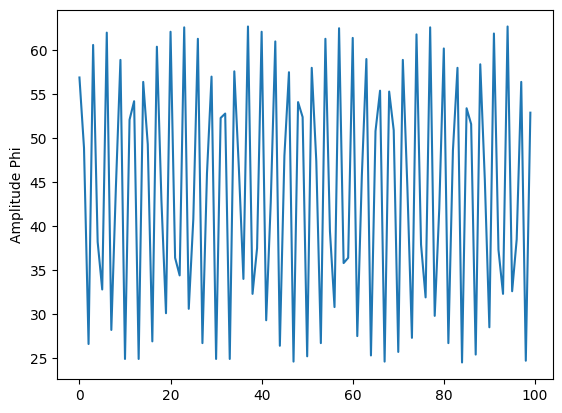

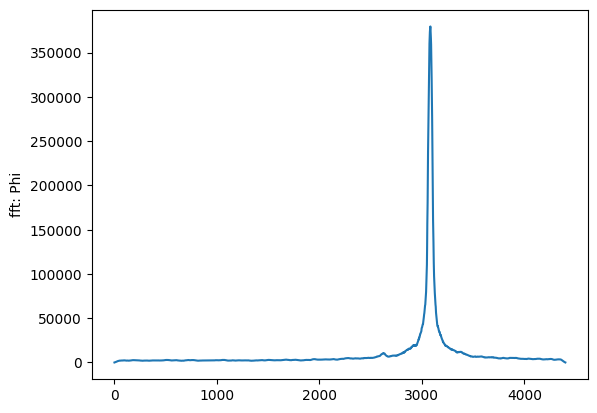

Average: 44.034673713235236
Average absolute deviation: 12.223820384728402
std dev: 13.556267778382004


[None, None]

In [50]:
def plot_with_fft(amplitude, name):
    avg = sum(amplitude) / len(amplitude)
    amplitude_offseted = list(map(lambda x: x - avg, amplitude))
    amplitude_fft = fft(amplitude_offseted)
    amplitude_fft_amplitude = np.sqrt(np.real(amplitude_fft) ** 2 + np.imag(amplitude_fft) ** 2)
    # N =len(amplitude_fft_amplitude)
    # xf = fftfreq(N, average_delta)[:N//2]
    amplitude_fft_amplitude = amplitude_fft_amplitude[0:len(amplitude_fft_amplitude) // 2]
    # f = IIR(0.9975)
    # f = RunningAverage(1)
    f = Gaussian(50, 20)
    amplitude_fft_real_filtered = f.filter_1d_array(amplitude_fft_amplitude)

    plt.plot(amplitude[:100])
    plt.ylabel(f"Amplitude {name}")
    plt.show()

    plt.plot(amplitude_fft_real_filtered)
    plt.ylabel(f"fft: {name}")
    plt.show()

    abs_dev = [abs(a - avg) for a in amplitude]
    square_dev = [(a - avg)**2 for a in amplitude]
    print(f"Average: {avg}")
    print(f"Average absolute deviation: {sum(abs_dev) / len(abs_dev)}")
    print(f"std dev: {math.sqrt(sum(square_dev) / len(square_dev))}")


[plot_with_fft([d[i] for d in data], df.columns[i]) for i in range(1, 3)]
# [plot_fft([d[i] for d in data], df.columns[i]) for i in range(1, 9)]

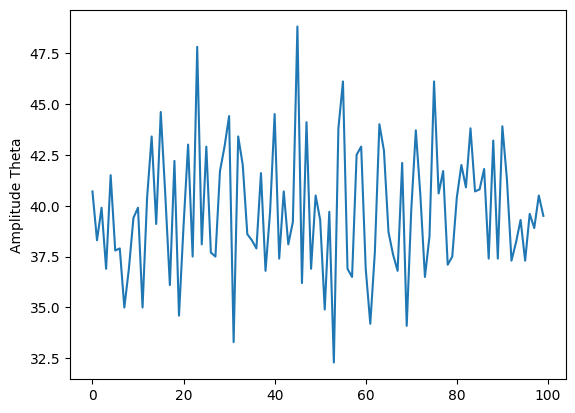

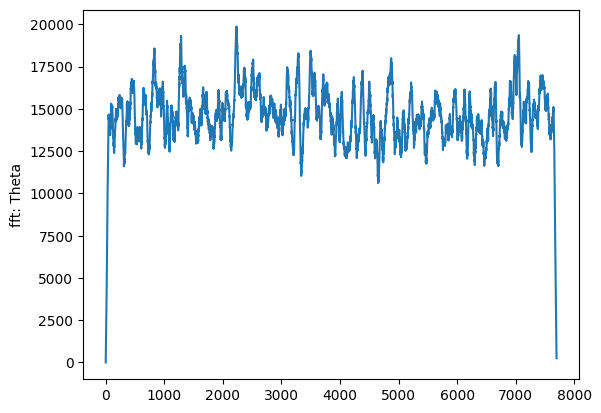

Average: 39.63496699993464
Average absolute deviation: 2.7382034272354545
std dev: 3.389891982154974


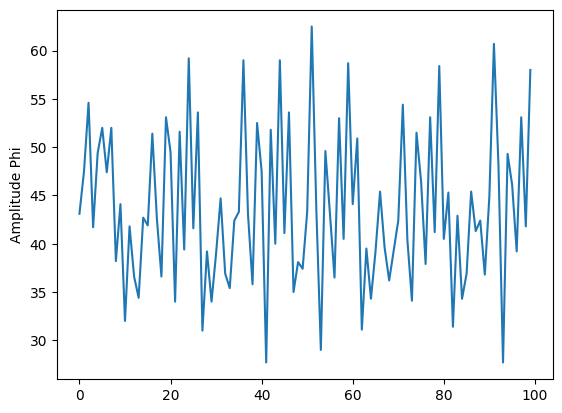

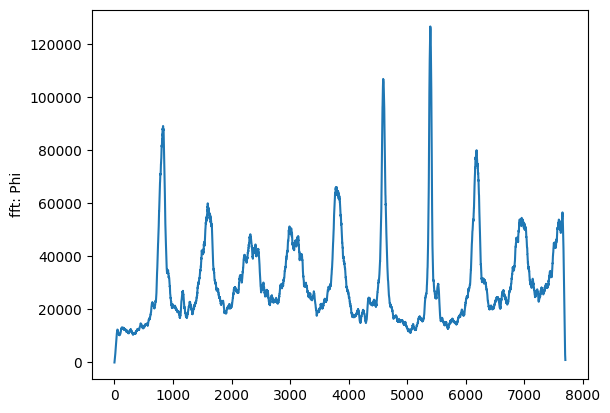

Average: 43.17478272234202
Average absolute deviation: 6.40186119665678
std dev: 8.008529476773695


[None, None]

In [66]:
[plot_with_fft([d[i] for d in data2], df.columns[i]) for i in range(1, 3)]

### Corellation

In [69]:
np.corrcoef([d[1] for d in data], [d[2] for d in data])

array([[ 1.        , -0.02485286],
       [-0.02485286,  1.        ]])

In [70]:
np.corrcoef([d[1] for d in data2], [d[2] for d in data2])

array([[ 1.        , -0.01848771],
       [-0.01848771,  1.        ]])

### My labels

In [51]:
N = len(data)
N

8704

In [52]:
my_theta = [random.gauss(mu=39.60754825367656, sigma = 3.38896847376098) for _ in range(N)]
my_theta

[38.62333265946576,
 41.442187907437116,
 44.088927517884066,
 41.802883728039944,
 40.57953531563259,
 38.45463397847171,
 46.0257629342569,
 44.801351825352455,
 38.78186435888509,
 41.920720135790475,
 34.86082170312863,
 40.943767981489486,
 36.52269265477658,
 36.66832111811247,
 40.029509229676755,
 43.229177099132336,
 38.61247224555056,
 42.48263022929069,
 37.6083331160953,
 40.15219152826653,
 38.14058419989925,
 36.11988503756282,
 41.553620635249345,
 36.78490763810752,
 43.10412936342703,
 46.79635953613256,
 37.60445173029195,
 37.671584160567924,
 42.60549672363646,
 45.25953760451368,
 42.91659500798121,
 42.54857443489652,
 35.64511637090907,
 32.105781222203255,
 41.21180748148915,
 39.48174489878854,
 42.74578669471291,
 35.88895504682126,
 34.78713269138284,
 39.58953018254457,
 36.96873710264243,
 41.013664172584264,
 39.714492024125384,
 36.96391627177264,
 31.90054517510264,
 44.9725209521014,
 34.54165671438839,
 42.06809594011794,
 38.217060810701,
 36.17452551

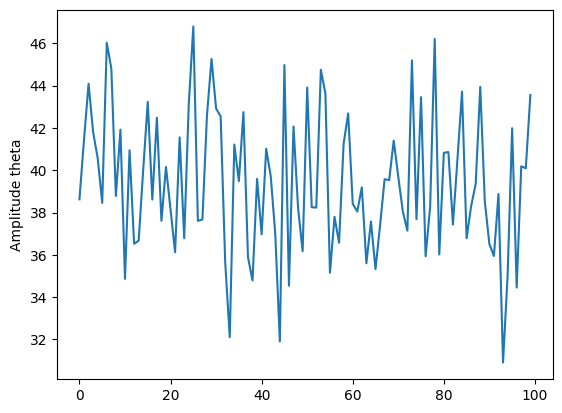

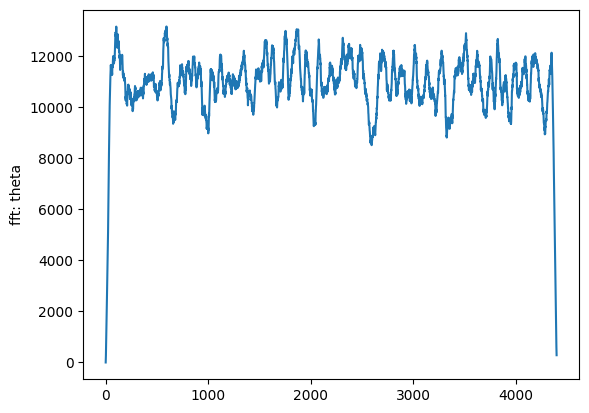

Average: 39.570213913682224
Average absolute deviation: 2.698722578342498
std dev: 3.375581381634227


In [53]:
plot_with_fft(my_theta, "theta")

In [54]:
T = average_delta
x = np.linspace(0.0, N*T, N, endpoint=False)
my_phi = np.sin(50.0 * 2.0*np.pi*x) * 19 + 44.034673713235236
my_phi

array([44.03467371, 31.47531644, 62.88298688, ..., 35.50875923,
       61.65613166, 26.1153848 ])

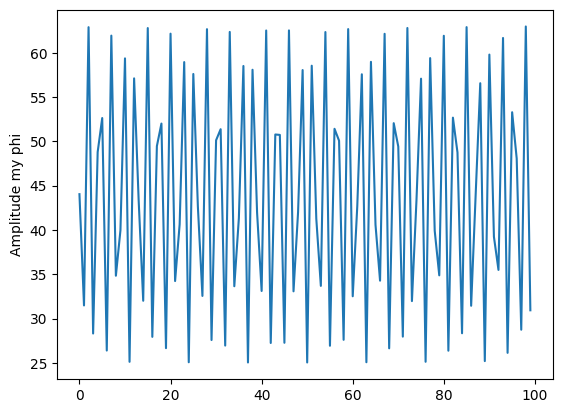

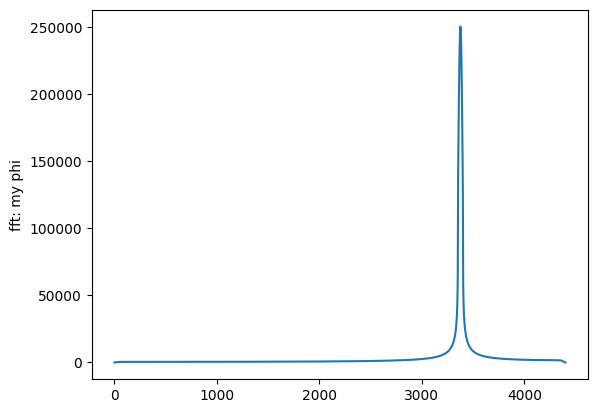

Average: 44.03336919082355
Average absolute deviation: 12.09567508166044
std dev: 13.435218170588112


In [55]:
plot_with_fft(my_phi, "my phi")

In [56]:
def plot(amplitude):
    f, ax = plt.subplots(1)
    ax.plot(amplitude)
    ax.set_ylim(ymin=0)
    plt.show(f)

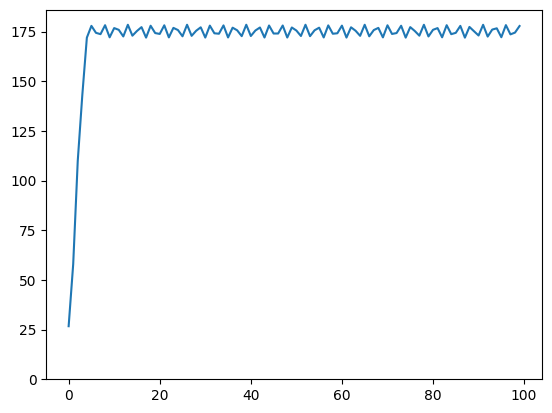

In [57]:
# f = IIR(0.9)
# f = RunningAverage(5)
f = Gaussian(5, 2)
my_phi_filtered = f.filter_1d_array(my_phi)
plot(my_phi_filtered[:100])

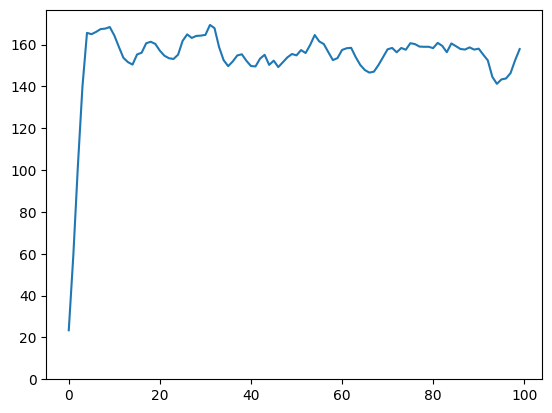

In [58]:
# f = EmptyFilter()
f = Gaussian(5, 2)
my_theta_filtered = f.filter_1d_array(my_theta)
plot(my_theta_filtered[:100])

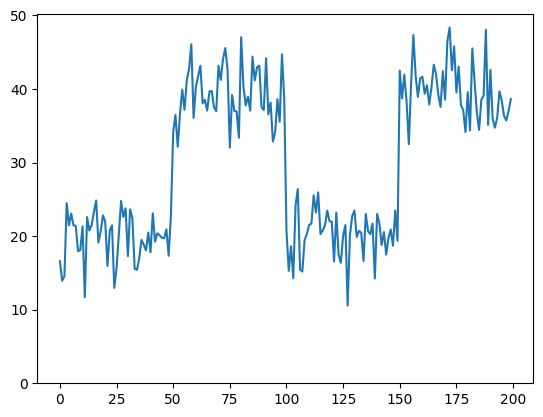

In [59]:
my_theta_mixed = [random.gauss(mu=39.60754825367656, sigma = 3.38896847376098) if i%2 else random.gauss(mu=20, sigma = 3.38896847376098) for i in range(N//50) for _ in range(50)]
# plot(my_theta_mixed)
plot(my_theta_mixed[:200])

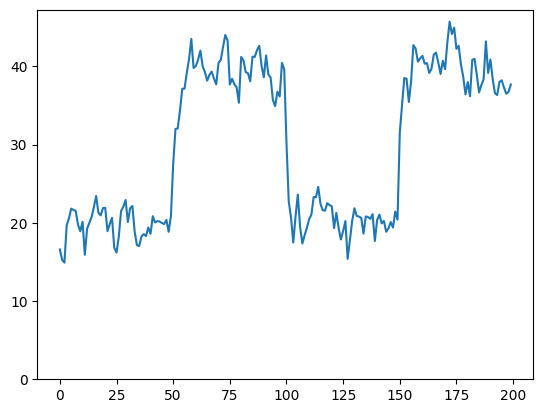

In [60]:
# f = EmptyFilter()
f = IIR(0.5)
# f = RunningAverage(5)
# f = Gaussian(5, 2)
my_theta_mixed_filtered = f.filter_1d_array(my_theta_mixed)
plot(my_theta_mixed_filtered[:200])

## Mix two real signal sources

In [61]:
N2 = min(len(data), len(data2))
i = 0
mixed_sources = []
mixed_sources_labels = []
first = True
while i < N2:
    for j in range(random.randint(5, 100)):
        if first:
            mixed_sources.append(data[i])
            mixed_sources_labels.append(0)
        else:
            mixed_sources.append(data2[i])
            mixed_sources_labels.append(1)
        i += 1
    first = not first

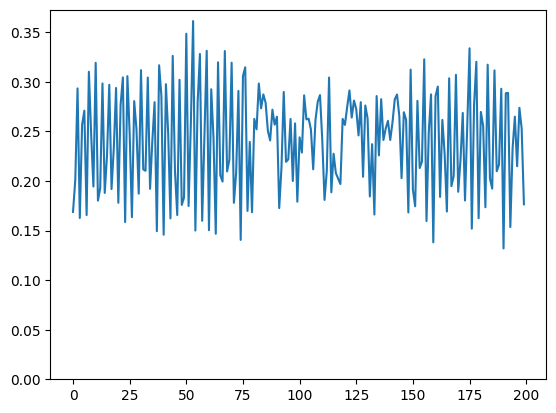

In [65]:
plot([x[7] for x in mixed_sources[:200]])

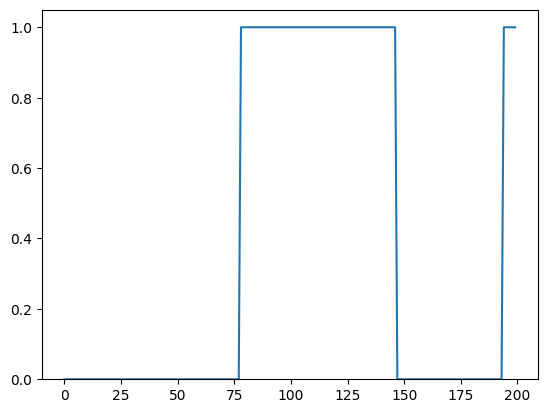

In [63]:
plot(mixed_sources_labels[:200])

In [78]:
train_xs = mixed_sources[:int(N*0.6)]
val_xs = mixed_sources[int(N*0.6):int(N*0.8)]
test_xs = mixed_sources[int(N*0.8):]

train_ys = mixed_sources_labels[:int(N*0.6)]
val_ys = mixed_sources_labels[int(N*0.6):int(N*0.8)]
test_ys = mixed_sources_labels[int(N*0.8):]

In [93]:
train_df = pd.concat([pd.DataFrame(train_xs, columns=columns), pd.DataFrame(train_ys, columns=["label"])], axis=1)
val_df = pd.concat([pd.DataFrame(val_xs, columns=columns), pd.DataFrame(val_ys, columns=["label"])], axis=1)
test_df = pd.concat([pd.DataFrame(test_xs, columns=columns), pd.DataFrame(test_ys, columns=["label"])], axis=1)
train_df

,datetime,Theta,Phi,X,Y,Z,|0>,|1> r,|1> i,label
0,2022-12-02 22:20:21.628247,36.0,56.9,0.320991,0.492399,0.809017,0.951057,0.168755,0.258869,0
1,2022-12-02 22:20:22.180768,35.6,48.9,0.382673,0.438667,0.813101,0.952129,0.200957,0.230361,0
2,2022-12-02 22:20:22.733142,38.3,26.6,0.554178,0.277512,0.784776,0.944663,0.293320,0.146884,0
3,2022-12-02 22:20:23.284986,38.7,60.6,0.306934,0.544720,0.780430,0.943512,0.162655,0.288666,0
4,2022-12-02 22:20:23.840155,38.1,38.2,0.484902,0.381580,0.786935,0.945234,0.256498,0.201844,0
...,...,...,...,...,...,...,...,...,...,...
5217,2022-12-02 23:08:23.118443,43.1,45.5,0.478913,0.487345,0.730162,0.930097,0.257453,0.261986,0
5218,2022-12-02 23:08:23.670839,44.9,59.1,0.362494,0.605684,0.708340,0.924213,0.196110,0.327675,0
5219,2022-12-02 23:08:24.223415,39.1,25.0,0.571586,0.266535,0.776046,0.942350,0.303277,0.141420,0
5220,2022-12-02 23:08:24.775530,37.4,51.9,0.374773,0.477965,0.794415,0.947210,0.197830,0.252302,0


In [115]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df, val_df, test_df,
               label_columns=None, train_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    self.train_columns = train_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    if train_columns is not None:
      self.train_columns_indices = {name: i for i, name in
                                    enumerate(train_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Train column name(s): {self.train_columns}',
        f'Label column name(s): {self.label_columns}'])

In [116]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['label'],
    train_df = train_df, val_df = val_df, test_df = test_df)
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Train column name(s): None
Label column name(s): ['label']

In [117]:
w2 = WindowGenerator(
    input_width=6, label_width=1, shift=1,
    label_columns=['label'],
    train_columns=['Phi'],
    train_df = train_df, val_df = val_df, test_df = test_df)
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Train column name(s): ['Phi']
Label column name(s): ['label']

In [118]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [125]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.train_columns_indices[name]] for name in self.train_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [126]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size][w2.train_columns]),
                           np.array(train_df[100:100+w2.total_window_size][w2.train_columns]),
                           np.array(train_df[200:200+w2.total_window_size][w2.train_columns])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 1)
Inputs shape: (3, 6, 1)
Labels shape: (3, 1, 1)


In [124]:
example_window

<tf.Tensor: shape=(3, 7, 1), dtype=float64, numpy=
array([[[56.9],
        [48.9],
        [26.6],
        [60.6],
        [38.2],
        [32.8],
        [62. ]],

       [[40.1],
        [49.7],
        [32.3],
        [40. ],
        [34.1],
        [38.8],
        [45.4]],

       [[49.3],
        [25.4],
        [50.7],
        [39.1],
        [59. ],
        [46.8],
        [53.3]]])>

In [127]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [132]:
@property
def train(self):
  return self.make_dataset(self.train_df["Phi"])

@property
def val(self):
  return self.make_dataset(self.val_df["Phi"])

@property
def test(self):
  return self.make_dataset(self.test_df["Phi"])

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [133]:
w2.train.element_spec

ValueError: in user code:

    File "C:\Users\Pawel\AppData\Local\Temp\ipykernel_30632\2245329259.py", line 2, in split_window  *
        inputs = features[:, self.input_slice, :]

    ValueError: Index out of range using input dim 2; input has only 2 dims for '{{node strided_slice}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=5, ellipsis_mask=0, end_mask=5, new_axis_mask=0, shrink_axis_mask=0](args_0, strided_slice/stack, strided_slice/stack_1, strided_slice/stack_2)' with input shapes: [?,?], [3], [3], [3] and with computed input tensors: input[3] = <1 1 1>.
